<a href="https://colab.research.google.com/github/geun-hyoung/StockPredictionByTextMining/blob/main/txt_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install nltk

In [3]:

import pandas as pd
file_path = "crawling_results.xlsx"
tf_idf_result_path = "tf_idf_results.xlsx"
sentences = pd.read_excel(file_path)['Text']
newspaper = pd.read_excel(file_path)['Newspaper']
year =  pd.read_excel(file_path)['Year']

In [4]:
# Year 열 날짜 변환

from datetime import datetime

date_result = []
for d in year:
  d =d.replace(","," ")
  d = ' '.join(d.split()[0:3])

  date_result.append(datetime.strptime(d, '%d %b %Y').strftime('%Y-%m-%d'))


In [5]:
print(newspaper)

0        Winnipeg Free Press\n09 Feb 2021, Winnipeg, Ma...
1        Burlington Hawk Eye\n05 Jan 2020, Burlington, ...
2        Elyria Chronicle Telegram\n07 Jan 2023, Elyria...
3        Tribune Star\n05 Jan 2020, Terre Haute, Indian...
4        Gallup Independent\n18 Sep 2021, Gallup, New M...
                               ...                        
12997    Burlington Hawk Eye\n06 Feb 2020, Burlington, ...
12998    Burlington Hawk Eye\n25 Jan 2020, Burlington, ...
12999     Salina Journal\n15 Jan 2020, Salina, Kansas, USA
13000    Tribune Star\n05 Jan 2020, Terre Haute, Indian...
13001    Jacksonville Journal Courier\n03 Jan 2020, Jac...
Name: Newspaper, Length: 13002, dtype: object


In [6]:

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer

import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [7]:

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import EnglishStemmer
from nltk.stem.lancaster import LancasterStemmer
lemmatizer = WordNetLemmatizer()
# stemmer = EnglishStemmer()
# stemmer = LancasterStemmer()
# stemmer = nltk.stem.PorterStemmer()
# lemmatizer = WordNetLemmatizer()

noun_words = ['cruise','combusiness', 'future','beans', 'murphy','crisis','rockets',
              'producevehicle','games','airlines','operators','facilities','scrutiny',
              'endorsement', 'warranty', 'excellence','videos','claims','masks','nations','vehicles','ploblems','photos',
              'sits','relations','covers','hands','tensions','capabilities','nations','requests','endorsements',
              'teams', 'ploblems','areas','bitcoin','streets','signs','possiblities','workers','sales','adopters','developments',
              'companies','clubs','dashboards','powerwalls','panalties','challenges','tasks','machines','households',
              'negotiations','politics','overseas','homeowners']
verb_words = ['have','waived','involving','abundoning','contribute','engaged','recalled','intensifying','led','curves',
              'received', 'charges', 'investigating', 'intensifying', 'said','retreating','considering','remains','began','displayed',
              'fired','lined','depanding','blamed','killing','sitting','opted','enticing','reviewing','contends','missed','balancing',
              'anticipated','jumped','delievered','shifted','killed','concerning','arrived','defects','argued','disclosed',
              'explained','appears','stopped','depending','battered','thinking','pressured','slowing','tumbling','tensifying',
              'explained','restarts','admitted','demands','totaled','demonstrates','opposing','interested','acting','taken','braking',
              'peaking','dethroned','met','guessed','developer','outstanding','performing','loaded','rides','launched','allows',
              'thrilled','operated','refusing','slumped','affected','appeared','removing','saying','related','troubled',
              'advanced','raised']
adject_words = ['innovative','healthy','residential','numerous','capable', 'altogether','nearest','safer',
                'defects', 'older']

# 단어 전처리 함수
def preprocess_word(text):
    text = text.lower()
    # 단어 단위로 분리
    # words = text.split()
    # print(words)
    # 각 단어에 lemmatization 적용
    # lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    tokens = nltk.word_tokenize(text)

    # 여러 개의 특정 단어를 명사로 표제어 추출
    tokens = [lemmatizer.lemmatize(word, pos='n') if word in noun_words else word for word in tokens]
    # 여러 개의 특정 단어를 동사로 표제어 추출
    tokens = [lemmatizer.lemmatize(word, pos='v') if word in verb_words else word for word in tokens]
    # 여러 개의 특정 단어를 형용사로 표제어 추출
    tokens = [lemmatizer.lemmatize(word, pos='a') if word in adject_words else word for word in tokens]

    # 다시 문장으로 결합
    # lemmatized_text = ' '.join(lemmatized_words)
    # stemmered_text = ' '.join(stemmered_words)
    return ' '.join(tokens)



In [20]:
lemmatizer.lemmatize('thrilled', pos='v')

'thrill'

In [8]:


# 불용어
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
custom_stop_words = set(ENGLISH_STOP_WORDS)
# tesla
# custom_stop_words.add('tesla')
# custom_stop_words.add('tsla')
# custom_stop_words.add('tesl')
# 기타
custom_stop_words.add('del')
custom_stop_words.add('www')
custom_stop_words.add('oti')
custom_stop_words.add('oit')
custom_stop_words.add('fut')
custom_stop_words.add('arnegie')
custom_stop_words.add('aut')
custom_stop_words.add('ionary')
custom_stop_words.add('istic')
custom_stop_words.add('latform') #platform
custom_stop_words.add('manuf')
custom_stop_words.add('mera')
custom_stop_words.add('gines') #engines
custom_stop_words.add('cedes')
custom_stop_words.add('prof') # profit
custom_stop_words.add('ract')
custom_stop_words.add('ove')
custom_stop_words.add('mov') #moving
custom_stop_words.add('rior') #interior
custom_stop_words.add('hen')
custom_stop_words.add('geogr')
custom_stop_words.add('deve')
custom_stop_words.add('ail')
custom_stop_words.add('gett')
custom_stop_words.add('oom')
custom_stop_words.add('compe')
custom_stop_words.add('ers')
custom_stop_words.add('unexp')
custom_stop_words.add('stor')
custom_stop_words.add('moni')
custom_stop_words.add('drivi')
custom_stop_words.add('mich')
custom_stop_words.add('xploded')
custom_stop_words.add('plaints') #complaint
custom_stop_words.add('wers')
custom_stop_words.add('ssages')
custom_stop_words.add('adob')
custom_stop_words.add('ngs')
custom_stop_words.add('idential') #residential
custom_stop_words.add('wer')
custom_stop_words.add('oyle')
custom_stop_words.add('jects') #projects
custom_stop_words.add('departm')
custom_stop_words.add('com')
custom_stop_words.add('lowing') #allowing
custom_stop_words.add('leged')
custom_stop_words.add('ailed')
custom_stop_words.add('wit')
custom_stop_words.add('req')
custom_stop_words.add('ined')
custom_stop_words.add('sponded')
custom_stop_words.add('ing')
custom_stop_words.add('dustrials')
custom_stop_words.add('publicans')
custom_stop_words.add('safel')
custom_stop_words.add('eature')
custom_stop_words.add('elivered')
custom_stop_words.add('cated')
custom_stop_words.add('sid')
custom_stop_words.add('tomakers') #automakers
custom_stop_words.add('estigated')
custom_stop_words.add('tensifying') #intensifying
custom_stop_words.add('rnalsaturday')
# custom_stop_words.add('non')
# 월 제외
custom_stop_words.add('january')
custom_stop_words.add('jan')
custom_stop_words.add('february')
custom_stop_words.add('feb')
custom_stop_words.add('march')
custom_stop_words.add('mar')
custom_stop_words.add('april')
custom_stop_words.add('apr')
custom_stop_words.add('may')
custom_stop_words.add('june')
custom_stop_words.add('jun')
custom_stop_words.add('july')
custom_stop_words.add('jul')
custom_stop_words.add('august')
custom_stop_words.add('aug')
custom_stop_words.add('september')
custom_stop_words.add('sep')
custom_stop_words.add('october')
custom_stop_words.add('oct')
custom_stop_words.add('nov')
custom_stop_words.add('november')
custom_stop_words.add('december')
custom_stop_words.add('dec')
# 요일 제거
custom_stop_words.add('mon')
custom_stop_words.add('monday')
custom_stop_words.add('tue')
custom_stop_words.add('tuesday')
custom_stop_words.add('wed')
custom_stop_words.add('wednesday')
custom_stop_words.add('thur')
custom_stop_words.add('thursday')
custom_stop_words.add('fri')
custom_stop_words.add('friday')
custom_stop_words.add('sat')
custom_stop_words.add('saturday')
custom_stop_words.add('sun')
custom_stop_words.add('sunday')


In [9]:
# 문장 전처리 적용
# processed_sentences = [preprocess_word(sentence) for sentence in sentences]
# print(processed_sentences)

# tfidf
vectorizer = TfidfVectorizer(max_features=None,token_pattern=r'\b[a-zA-Z]{3,}\b',
                             stop_words=list(custom_stop_words),preprocessor=preprocess_word)
# r'\b[a-zA-Z]{3,}\b'
# ,preprocessor=preprocess_word

X = vectorizer.fit_transform(sentences)

# 단어 목록
feature_names = vectorizer.get_feature_names_out()
# print(feature_names)

tfidf_df = pd.DataFrame(X.toarray(), columns=feature_names)
# print(tfidf_df)

# 결과를 엑셀 파일로 저장
# tfidf_df.to_excel(excel_file_path, index=True)

# print(tfidf_df)
tfidf_df


,aaa,aalto,aaron,aau,aba,aban,aband,abando,abandon,abandoned,...,zunga,zungali,zurich,zying,zym,zyme,zynaga,zynga,zyversa,zzella
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


tesla        1376.288634
tsla          872.463441
texinst       468.720576
tellurian     408.879350
target        393.407015
                ...     
hagstr          0.157333
suzuki          0.157333
lefur           0.157333
mmons           0.127593
ummons          0.127593
Length: 15813, dtype: float64


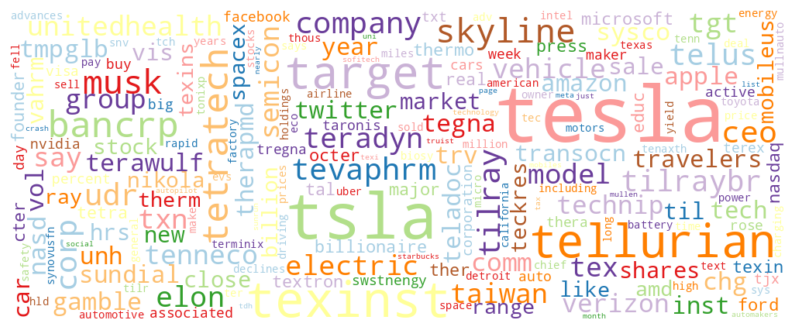

In [10]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 워드 클라우드 생성 함수
def generate_wordcloud(tfidf_df):
    # 단어와 해당하는 TF-IDF 값을 딕셔너리로 변환

    tfidf_counter = tfidf_df.T.sum(axis=1)
    print(tfidf_counter.sort_values(ascending=False))
    # 워드 클라우드 생성
    wordcloud = WordCloud(width=1000, height=400, background_color='white',min_font_size=5,max_font_size=100,colormap = "Paired").generate_from_frequencies(tfidf_counter)

    # 시각화
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

generate_wordcloud(tfidf_df)



In [37]:
from textblob import TextBlob

# 감성 분석 함수
def sentiment_analysis(sentences):
    sentiments = []
    for sentence in sentences:
        blob = TextBlob(sentence)
        sentiment = blob.sentiment.polarity  # -1에서 1까지의 값을 반환
        sentiments.append(sentiment)
    return sentiments

sentiments = sentiment_analysis(sentences)

print(sentiments)


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
-1.61 Amber 22,801 3.36 -.07 Nokia up 22,603 5.42 .03 Tesla inc s 22,598 659.58 -19.32 Exxon by 22,096 61.37 -1....
rate of .1%. He wasnâ€™t the only one. Elon Musk, the Tesla found- er, paid $455 million in taxes during the sam...
r Iffus department. 7 41 . Arrest. Rachael Marie Hunt Tesla 23, Logansport was arrested on charges of Possession...
9 20.23 20.48 -3.14 Tellurian ... 4.68 3.85 3.87 -.86 Tesla Inc s ... 628.35 593.50 623.31 +13.42 3M Co 5.92f 20...
t TCW Strat TJX Target Tegna Tellurian Tenneco Tesla Inc s TevaPhrm TexInst TexRdhse Textron TherapM...
der Jeff Bezos paid no in- come tax in 2007 and 2011. Tesla founder Elon Muskâ€™s income tax bill was zero in 2...
s of work and people than it is for others. I doubt Tesla can go this route, nor can Martin Guitar. But for t...
es. Automakers from General Motors to Volkswagen to Tesla are looking for ways to get closer to the chipmakin...
ial h.77 .05 63.3 target 2.72 1.2 29 221.79 2.78 25.6 T

In [12]:

# 문장에서 상위 키워드 추출 함수
def extract_keywords(sentence, all_keywords, max_keywords=None):
    tfidf_values = vectorizer.transform([sentence]).toarray()[0]
    sorted_indices = tfidf_values.argsort()[-max_keywords:][::-1]
    keywords = [all_keywords[idx] for idx in sorted_indices]
    return ', '.join(keywords)

# 문장을 벡터화하여 모든 키워드 추출
all_keywords = vectorizer.get_feature_names_out()

# # 키워드 분석 결과 얻기
# keywords_per_sentence = [extract_keywords(sentence, all_keywords, max_keywords=5) for sentence in sentences]
# keywords_per_sentence

In [13]:
import numpy as np
# 엑셀 파일에 결과 추가 함수
def add_results_to_excel(sentences, excel_filename):
    # 감성 분석 결과 얻기
    sentiments = sentiment_analysis(sentences)

    # TF-IDF 분석 결과 얻기

    # 키워드 분석 결과 얻기
    keywords_per_sentence = [extract_keywords(sentence, all_keywords, max_keywords=5) for sentence in sentences]

    # 뉴스 -키워드 데이터 엑셀로
    results_1 = pd.DataFrame({
        'Sentences': sentences,
        'Keywords' : keywords_per_sentence
    })
    results_1.to_excel('News_Keys_results.xlsx', index = False)

    # 결과를 DataFrame으로 변환
    # results_df = pd.DataFrame({
    #     'Newspaper': newspaper,
    #     'Year' : date_result,
    #     'Sentences': sentences,
    #     'Sentiment': sentiments,
    #     'Keywords' : keywords_per_sentence
    # })

    # 결과를 엑셀 파일에 저장
    # results_df.to_excel(excel_filename, index=False)

# 엑셀 파일에 결과 추가
add_results_to_excel(sentences, 'analysis_results.xlsx')

----------------------
날짜별 키워드 추출

In [14]:
# 날짜별 키워드

date_keyword_result = {
    'Date': date_result,
    'Sentences': sentences
}

df = pd.DataFrame(date_keyword_result)

grouped_data = df.groupby('Date')['Sentences'].apply(lambda x: ', '.join(x)).reset_index(name='Grouped Sentences')

# grouped_data.to_excel('date_text.xlsx', index = False)

In [15]:
# tfidf_date = tfidf_analysis(sentences, max_features=None)
# tfidf_date
# sentence_date = grouped_data['Grouped Sentences'].to_string()
# print(sentence_date)
keywords_per_date_sentence = [extract_keywords(sentence, all_keywords, max_keywords=10)  for sentence in grouped_data['Grouped Sentences']]

date_keyword_result = pd.DataFrame({
    'Date': grouped_data['Date'],
    # 'Sentences': grouped_data['Grouped Sentences'],
    'Keywords' : keywords_per_date_sentence
})
date_keyword_result
date_keyword_result.to_excel('date_keywords_results.xlsx', index = False)

----

감성분석 결과 열 추가

In [33]:

# senti = 2: 부정
# senti = 1: 긍정
# senti = 0: 중립

def map_sentiments(sentiments):
  if sentiments >=-1 and sentiments <-0.2:
    return 2 #부정
  elif sentiments>=-0.2 and sentiments<0.2:
    return 0 #중립
  else: # 0.2<= senti <=1.0
    return 1 #긍정

senti = [map_sentiments(i) for i in sentiments]

data_senti = pd.DataFrame({
    'Senti':  senti,
    'Sentences': sentences
})

data_senti


,Senti,Sentences
0,1,"Y, FEBRUARY 9, 2021 â—� WINNIPEGFREEPRESS.COMB..."
1,0,oit three crashes involving Tesla that killed ...
2,0,"rk shadow on Tesla,â€� Wedbush Securities anal..."
3,0,killing a passenger in the Tesla. And on dec. ...
4,0,merican nations in them that could be interest...
...,...,...
12997,0,amp a .28 .04 Kraft Hnz 5.4 29.37 .22 2.6 144....
12998,0,.20 key corp 19.29 -54 -.30 pars Leyen 16.93 ....
12999,0,t 125.26 1.39 technic 20.97 -.37 Tec Kres g 16...
13000,1,64 Tregna .28 top Drin 4.00e to Gib .30 Tenn e...


In [35]:
print("부정비율",senti.count(2)/len(senti))
print("긍정비율",senti.count(1)/len(senti))
print("중립비율",senti.count(0)/len(senti))
# 시간 남으면 sentiwordnet과 결과 비교해서 더 좋은것 사용

부정비율 0.01915089986155976
긍정비율 0.13051838178741731
중립비율 0.8503307183510229


In [36]:
data_senti.to_excel('sentiments.xlsx', index=False)